In [7]:
import numpy as np
import os
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D

In [4]:
def save_data(name, train, test, bounds, overwrite = False):
    if not os.path.exists(os.path.join('data/', f'{name}_test.npy')) or overwrite:
        np.save(os.path.join('data/', f'{name}_train.npy'), train)
        np.save(os.path.join('data/', f'{name}_test.npy'), test)
        np.save(os.path.join('data/', f'{name}_bounds.npy'), bounds)

In [5]:
def get_gaussian(mean, cov_mat, samples):
    return np.random.multivariate_normal(mean, cov_mat, samples)

In [6]:
def make_plot(samples):
    plt.scatter(samples[:, 0], samples[:, 1], s = 2)

# Correlated Gaussians

Data saved


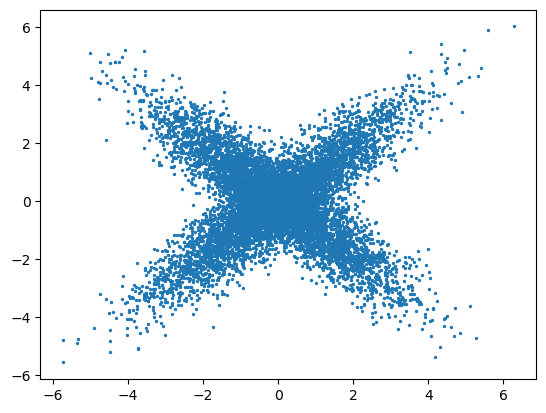

In [6]:
dim = 2
train_samples, test_samples = 10_000, 5_000
cov_mat1 = np.array([
    [2.5, -2.25],
    [-2.25, 2.5]
])

cov_mat2 = ([
    [2.5, 2.25],
    [2.25, 2.5]
])

name = 'x_gaussian'
g1 = get_gaussian(np.zeros(dim), cov_mat1, train_samples // 2)
g2 = get_gaussian(np.zeros(dim), cov_mat2, train_samples // 2)
train = np.concatenate((g1, g2), axis = 0)
g1 = get_gaussian(np.zeros(dim), cov_mat1, test_samples // 2)
g2 = get_gaussian(np.zeros(dim), cov_mat2, test_samples // 2)
test = np.concatenate((g1, g2), axis = 0)
bounds = np.array([[-6, 6], [-6, 6]])

make_plot(train)
save_data(name, train, test, bounds, True)
print('Data saved')

Data saved


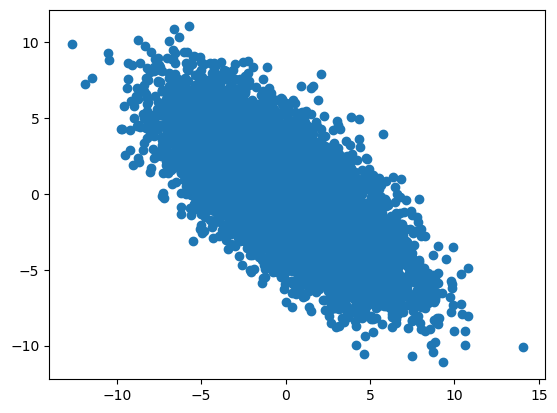

In [5]:
dim = 2
train_samples, test_samples = 10_000, 5_000
cov_mat = [
    [10.0, -7.0],
    [-7.0, 10.0],
]

name = 'correlated_gaussians'
train = get_gaussian(np.zeros(dim), cov_mat, train_samples)
test = get_gaussian(np.zeros(dim), cov_mat, test_samples)
train = train - np.mean(train, axis = 0)
test = test - np.mean(test, axis = 0)
bounds = np.array([[-15, 15], [-15, 15]])

make_plot(train)
save_data(name, train, test, bounds, True)
print('Data saved')

# Gaussian Mixture

Data saved


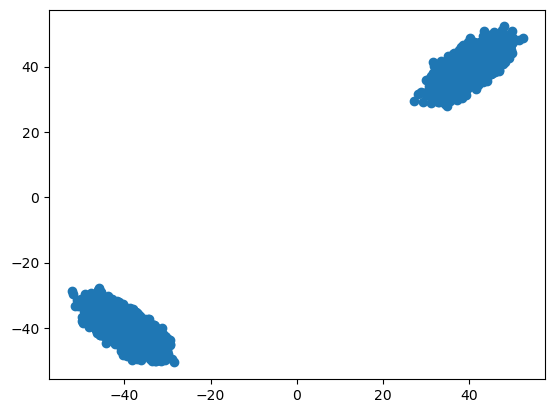

In [6]:
dim = 2
train_samples, test_samples = 10_000, 5_000
cov_mat1 = [
    [10.0, -7.0],
    [-7.0, 10.0],
]
cov_mat2 = [
    [10.0, 7.0],
    [7.0, 10.0],
]

train1 = get_gaussian(-40 * np.ones(dim), cov_mat1, train_samples)
train2 = get_gaussian(40 * np.ones(dim), cov_mat2, train_samples)

test1 = get_gaussian(-40 * np.ones(dim), cov_mat1, test_samples)
test2 = get_gaussian(40 * np.ones(dim), cov_mat2, test_samples)

name = 'gaussian_mixture'
train = np.concatenate((train1, train2), axis = 0)
test = np.concatenate((test1, test2), axis = 0)
train = train - np.mean(train, axis = 0)
test = test - np.mean(test, axis = 0)
bounds = np.array([[-60, 60], [-60, 60]])

make_plot(train)
save_data(name, train, test, bounds, True)
print('Data saved')

# Independent, extreme case

Data saved


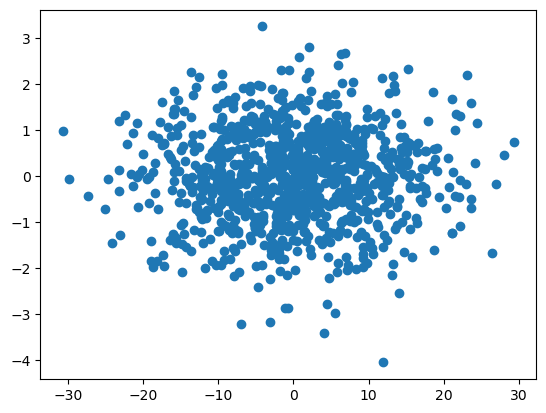

In [35]:
dim = 2
train_samples, test_samples = 1_000, 5_00
cov_mat = [
    [100.0, 0.0],
    [0.0, 1.0],
]

name = 'indep_extreme'
train = get_gaussian(np.zeros(dim), cov_mat, train_samples)
test = get_gaussian(np.zeros(dim), cov_mat, test_samples)
train = train - np.mean(train, axis = 0)
test = test - np.mean(test, axis = 0)
bounds = np.array([[-30, 30], [-30, 30]])

make_plot(train)
save_data(name, train, test, bounds, True)
print('Data saved')

# Independent, mild case

Data saved


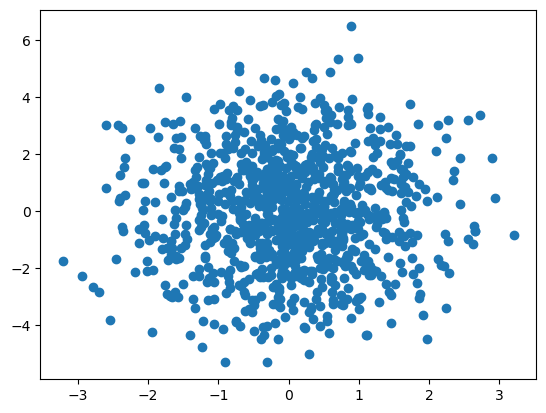

In [36]:
dim = 2
train_samples, test_samples = 1_000, 5_00
cov_mat = [
    [1.0, 0.0],
    [0.0, 4.0],
]

name = 'indep'
train = get_gaussian(np.zeros(dim), cov_mat, train_samples)
test = get_gaussian(np.zeros(dim), cov_mat, test_samples)
train = train - np.mean(train, axis = 0)
test = test - np.mean(test, axis = 0)
bounds = np.array([[-7, 7], [-7, 7]])

make_plot(train)
save_data(name, train, test, bounds, True)
print('Data saved')

# Quadratic

Data saved


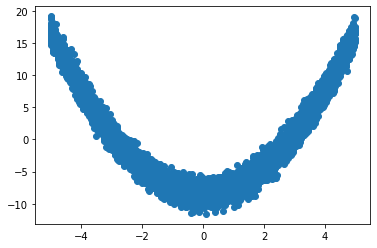

In [6]:
dim = 2
train_samples, test_samples = 10_000, 5_000

name = 'quadratic'

train_x = -5 + 10 * np.random.random(train_samples)
train_y = train_x ** 2 + np.random.randn(train_samples)
train = np.concatenate((train_x.reshape((-1, 1)), train_y.reshape((-1, 1))), axis = 1)

test_x = -5 + 10 * np.random.random(test_samples)
test_y = test_x ** 2 + np.random.randn(test_samples)
test = np.concatenate((test_x.reshape((-1, 1)), test_y.reshape((-1, 1))), axis = 1)
train = train - np.mean(train, axis = 0)
test = test - np.mean(test, axis = 0)

bounds = np.array([[-15, 20]] * 2)
make_plot(train)
save_data(name, train, test, bounds, True)
print('Data saved')

# Swiss Rolls

In [6]:
def make_swiss_roll(a, b, wraps, samples, noise):
    cov_mat = np.eye(2)
    data = np.random.random(samples)
    theta = 2 * wraps * math.pi * data
    data = data * np.array([a * np.cos(theta), b * np.sin(theta)])
    data = data.T + noise * get_gaussian(np.zeros(2), cov_mat, samples)
    data = data - np.mean(data, axis = 0)
    return  data

## Symmetric Swiss Roll

Data Saved


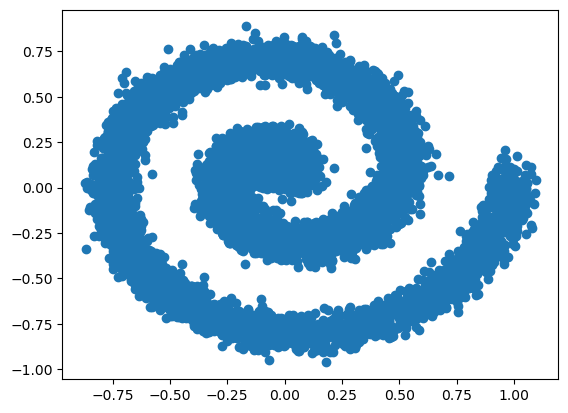

In [7]:
dim = 2
train_samples, test_samples = 10_000, 5_000
a, b, wraps, noise = 1, 1, 2, 0.05

name = 'symm_swiss_roll'
train = make_swiss_roll(a, b, wraps, train_samples, noise)
test = make_swiss_roll(a, b, wraps, test_samples, noise)
bounds = np.array([[-1.5, 1.5]] * 2)
make_plot(train)
save_data(name, train, test, bounds, True)
print('Data Saved')

Data Saved


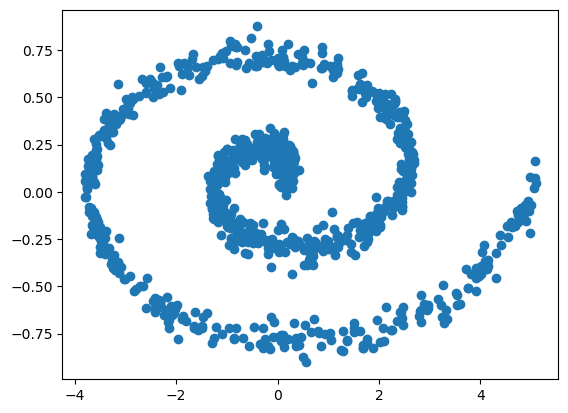

In [40]:

dim = 2
train_samples, test_samples = 1_000, 5_00
a, b, wraps, noise = 5, 1, 2, 0.05

name = 'deformed_swiss_roll'
train = make_swiss_roll(a, b, wraps, train_samples, noise)
test = make_swiss_roll(a, b, wraps, test_samples, noise)
bounds = np.array([[-6, 6]] * 2)
make_plot(train)
save_data(name, train, test, bounds, True)
print('Data Saved')

# Sinusoid

Data Saved


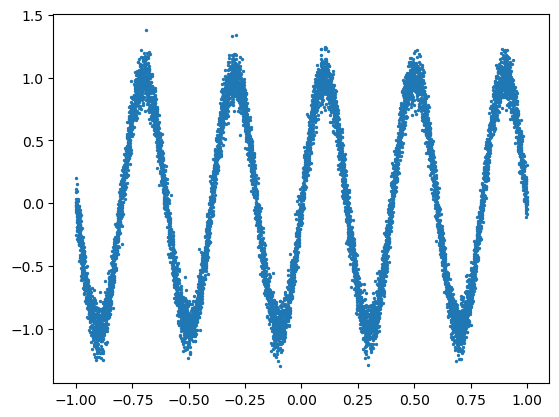

In [8]:
train_samples, test_samples = 10_000, 5_000
train_x = 2 * np.random.random(train_samples) - 1
train_y = np.sin(5 * np.pi * train_x) + 0.1 * np.random.randn(train_samples)
train = np.concatenate((train_x.reshape((-1, 1)), train_y.reshape((-1, 1))), axis = 1)

test_x = 2 * np.random.random(test_samples) - 1
test_y = np.sin(5 * np.pi * test_x) + 0.1 * np.random.randn(test_samples)
test = np.concatenate((test_x.reshape((-1, 1)), test_y.reshape((-1, 1))), axis = 1)

name = 'sinusoid'

make_plot(train)

bounds = np.array([[-4, 4]] * 2)

save_data(name, train, test, bounds, True)
print('Data Saved')


Data Saved


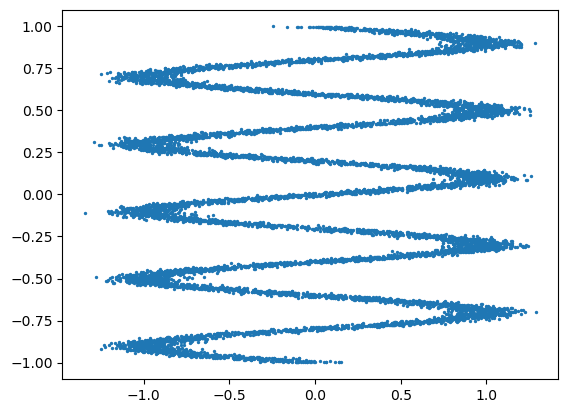

In [10]:
train_samples, test_samples = 10_000, 5_000
train_x = 2 * np.random.random(train_samples) - 1
train_y = np.sin(5 * np.pi * train_x) + 0.1 * np.random.randn(train_samples)
train = np.concatenate((train_y.reshape((-1, 1)), train_x.reshape((-1, 1))), axis = 1)

test_x = 2 * np.random.random(test_samples) - 1
test_y = np.sin(5 * np.pi * test_x) + 0.1 * np.random.randn(test_samples)
test = np.concatenate((test_y.reshape((-1, 1)), test_x.reshape((-1, 1))), axis = 1)

name = 'sinusoid_vert'

make_plot(train)

bounds = np.array([[-4, 4]] * 2)

save_data(name, train, test, bounds, True)
print('Data Saved')


## Circular sinusoid with changing frequency

Data saved


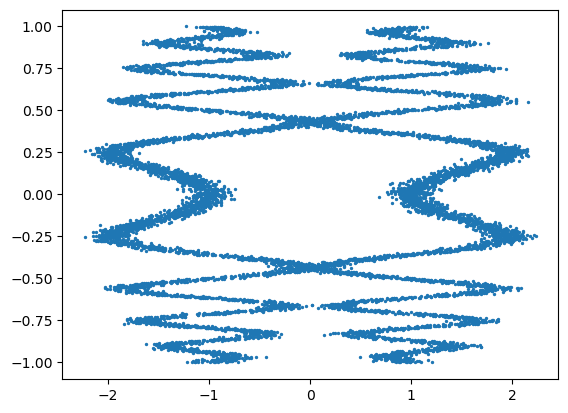

In [17]:
train_samples, test_samples = 10_000, 5_000

eps = 0
train_x1 = (1 - eps) * (2 * np.random.random(train_samples // 2) - 1)
train_x2 = (1 - eps) * (2 * np.random.random(train_samples // 2) - 1)
train_y1 = np.sqrt(1 - train_x1 ** 2) * np.sin((5 * train_x1) ** 2) + 0.1 * np.random.randn(train_samples // 2) + 1
train_y2 = - np.sqrt(1 - train_x2 ** 2) * np.sin((5 * train_x2) ** 2) - 0.1 * np.random.randn(train_samples // 2) - 1
train_x = np.concatenate((train_x1, train_x2))
train_y = np.concatenate((train_y1, train_y2))
train = np.concatenate((train_y.reshape((-1, 1)), train_x.reshape((-1, 1))), axis = 1)

test_x1 = (1 - eps) * (2 * np.random.random(test_samples // 2) - 1)
test_x2 = (1 - eps) * (2 * np.random.random(test_samples // 2) - 1)
test_y1 = np.sqrt(1 - test_x1 ** 2) * np.sin((5 * test_x1) ** 2) + 0.1 * np.random.randn(test_samples // 2) + 1
test_y2 = - np.sqrt(1 - test_x2 ** 2) * np.sin((5 * test_x2) ** 2) - 0.1 * np.random.randn(test_samples // 2) - 1
test_x = np.concatenate((test_x1, test_x2))
test_y = np.concatenate((test_y1, test_y2))
test = np.concatenate((test_y.reshape((-1, 1)), test_x.reshape((-1, 1))), axis = 1)
name = 'symm_circ_sin'

bounds = np.array([[-4, 4]] * 2)

make_plot(train)
save_data(name, train, test, bounds)
print('Data saved')

# Helix

/var/folders/rq/8pknsfvx5gv5c4pz4v9tm2n40000gn/T/ipykernel_81603/1454238168.py:21: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


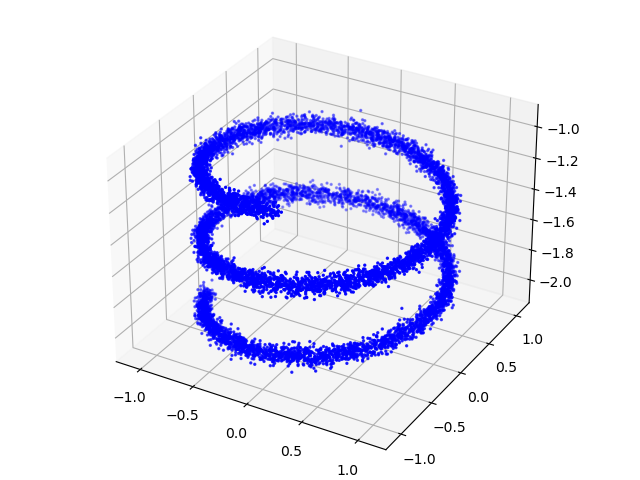

In [18]:
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D
train_samples, test_samples = 10_000, 5_000 

z = -2 + 1 * np.random.random(train_samples)
r = 1
x = r * np.cos(14 * z) + 0.03 * np.random.randn(train_samples)
y = r * np.sin(14 * z) + 0.03* np.random.randn(train_samples)
z = z + 0.03 * np.random.randn(train_samples)
train = np.concatenate((x.reshape((-1, 1)), y.reshape((-1, 1)), z.reshape((-1, 1))), axis = 1)


z = -2 + 1 * np.random.random(test_samples)
r = 1
x = r * np.cos(14 * z) + 0.03 * np.random.randn(test_samples)
y = r * np.sin(14 * z) + 0.03* np.random.randn(test_samples)
z = z + 0.03 * np.random.randn(test_samples)
test = np.concatenate((x.reshape((-1, 1)), y.reshape((-1, 1)), z.reshape((-1, 1))), axis = 1)

fig = plt.figure()
ax = Axes3D(fig)
# D = {1:train[:,0],2:train[:,1],3:train[:,2],'c'}
plot_graph = ax.scatter(train[:,0],train[:,1],train[:,2], c = 'blue', s = 2)
ax.set_title('Helix dataset')
plt.show()
# plt.imsave("a.png", ax)
# plt.savefig("a.png")
# 
name = 'helix_3D'
bounds = np.array([[-1,1]]*3)
save_data(name, train, test, bounds)


# 3D sinusoid bounded in circle

In [8]:
%matplotlib widget

train_samples, test_samples = 10_000, 5_000
x = -1 + 2 * np.random.random(2 * train_samples)
y = -1 + 2 * np.random.random(2 * train_samples)
xy = np.concatenate((x.reshape((-1, 1)), y.reshape((-1, 1))), axis = 1)
xy = xy[np.linalg.norm(xy, axis = 1) < 1]
a = 1
z = a * np.sin(5 * xy[:, 0]) * np.cos(5 * xy[:, 1]) * (1 - np.sqrt(xy[:, 0] ** 2 + xy[:, 1] ** 2))
z = z + 0.01 * np.random.randn(z.shape[0])
train = np.concatenate((xy, z.reshape((-1, 1))), axis = 1)
train = train[:, [1, 2, 0]]

x = -1 + 2 * np.random.random(2 * test_samples)
y = -1 + 2 * np.random.random(2 * test_samples)
xy = np.concatenate((x.reshape((-1, 1)), y.reshape((-1, 1))), axis = 1)
xy = xy[np.linalg.norm(xy, axis = 1) < 1]
a = 1
z = a * np.sin(5 * xy[:, 0]) * np.cos(5 * xy[:, 1]) * (1 - np.sqrt(xy[:, 0] ** 2 + xy[:, 1] ** 2))
z = z + 0.01 * np.random.randn(z.shape[0])
test = np.concatenate((xy, z.reshape((-1, 1))), axis = 1)
test = test[:, [1, 2, 0]]

name = '3d_sin_5_5_cycled'
fig = plt.figure()
ax = Axes3D(fig)
bounds = np.array([[-1, 1]] * 3)
plot_graph = ax.scatter(train[:, 0], train[:, 1], train[:, 2], s = 2)
plt.show()
save_data(name, train, test, bounds)

ModuleNotFoundError: No module named 'ipympl'

Data saved


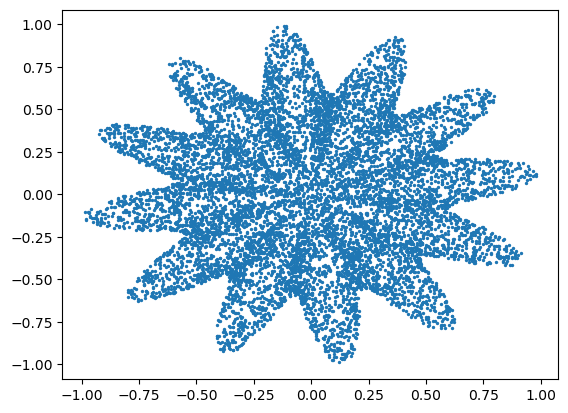

In [13]:
train_samples, test_samples = 10_000, 5_000

theta = 2 * np.pi * np.random.random(train_samples).reshape((-1, 1))
r = np.sqrt(np.random.random(train_samples)).reshape((-1, 1))
r = r * (0.8 + 0.2 * np.sin(12 * theta))
train = np.concatenate((r * np.cos(theta), r * np.sin(theta)), axis = 1)

theta = 2 * np.pi * np.random.random(test_samples).reshape((-1, 1))
r = np.sqrt(np.random.random(test_samples)).reshape((-1, 1))
r = r * (0.8 + 0.2 * np.sin(12 * theta))
test = np.concatenate((r * np.cos(theta), r * np.sin(theta)), axis = 1)

bounds = np.array([[-4, 4]] * 2)
name = '12_petals'
make_plot(train)
save_data(name, train, test, bounds)
print('Data saved')